# Female Members of Parliament

This notebook explores and visualizes the proportion of female MP's in national parliaments worldwide over time.

- Date: 2019-03-08
- Source: [The World Bank](https://data.worldbank.org/indicator/sg.gen.parl.zs?end=2018&start=1990)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.plot import ds_plot

%config InlineBackend.figure_format = 'retina'

if 'datastory' in plt.style.available:
    plt.style.use('datastory')

In [2]:
df = pd.read_csv('../data/raw/female_mps/API_SG.GEN.PARL.ZS_DS2_en_csv_v2_10473744.csv', skiprows=3)
meta = pd.read_csv('../data/raw/female_mps/Metadata_Country_API_SG.GEN.PARL.ZS_DS2_en_csv_v2_10473744.csv')

## Transform

In [3]:
meta = meta[['Country Code', 'Region']]

In [4]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)
df = df.dropna(how='all', axis=1)

In [5]:
df = meta.merge(df, on='Country Code').drop('Country Code', axis=1)

In [6]:
weighted_avgs = df[df['Region'].isnull()].copy().set_index('Country Name').drop('Region', axis=1)

In [7]:
df = df[df.Region.notnull()]

In [8]:
df = df.set_index(['Region', 'Country Name']).sort_index()

In [9]:
df = df.dropna(how='all')

In [10]:
region_map = {
    'Europe & Central Asia': 'Europa och Centralasien',
    'East Asia & Pacific': 'Östasien och Stilla havsområdet',
    'Latin America & Caribbean': 'Latinamerika och Karibien',
    'Middle East & North Africa': 'Mellanöstern och Nordafrika',
    'North America': 'Nordamerika',
    'South Asia': 'Sydasien',
    'Sub-Saharan Africa': 'Afrika söder om Sahara'
}

## Plot

In [11]:
def ds_style(ax):
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['bottom'].set_color('#e1e1e1')
    
    for tick in ax.get_xticklabels():
        tick.set_weight('regular')
        tick.set_size(12)

    for tick in ax.get_yticklabels():
        tick.set_weight('regular')
        tick.set_size(12)
        
    ax.xaxis.set_tick_params(length=0, color='#c2c2c3')

    ax.tick_params(axis='x', which='major', pad=10)
    ax.tick_params(axis='y', which='major', pad=8)

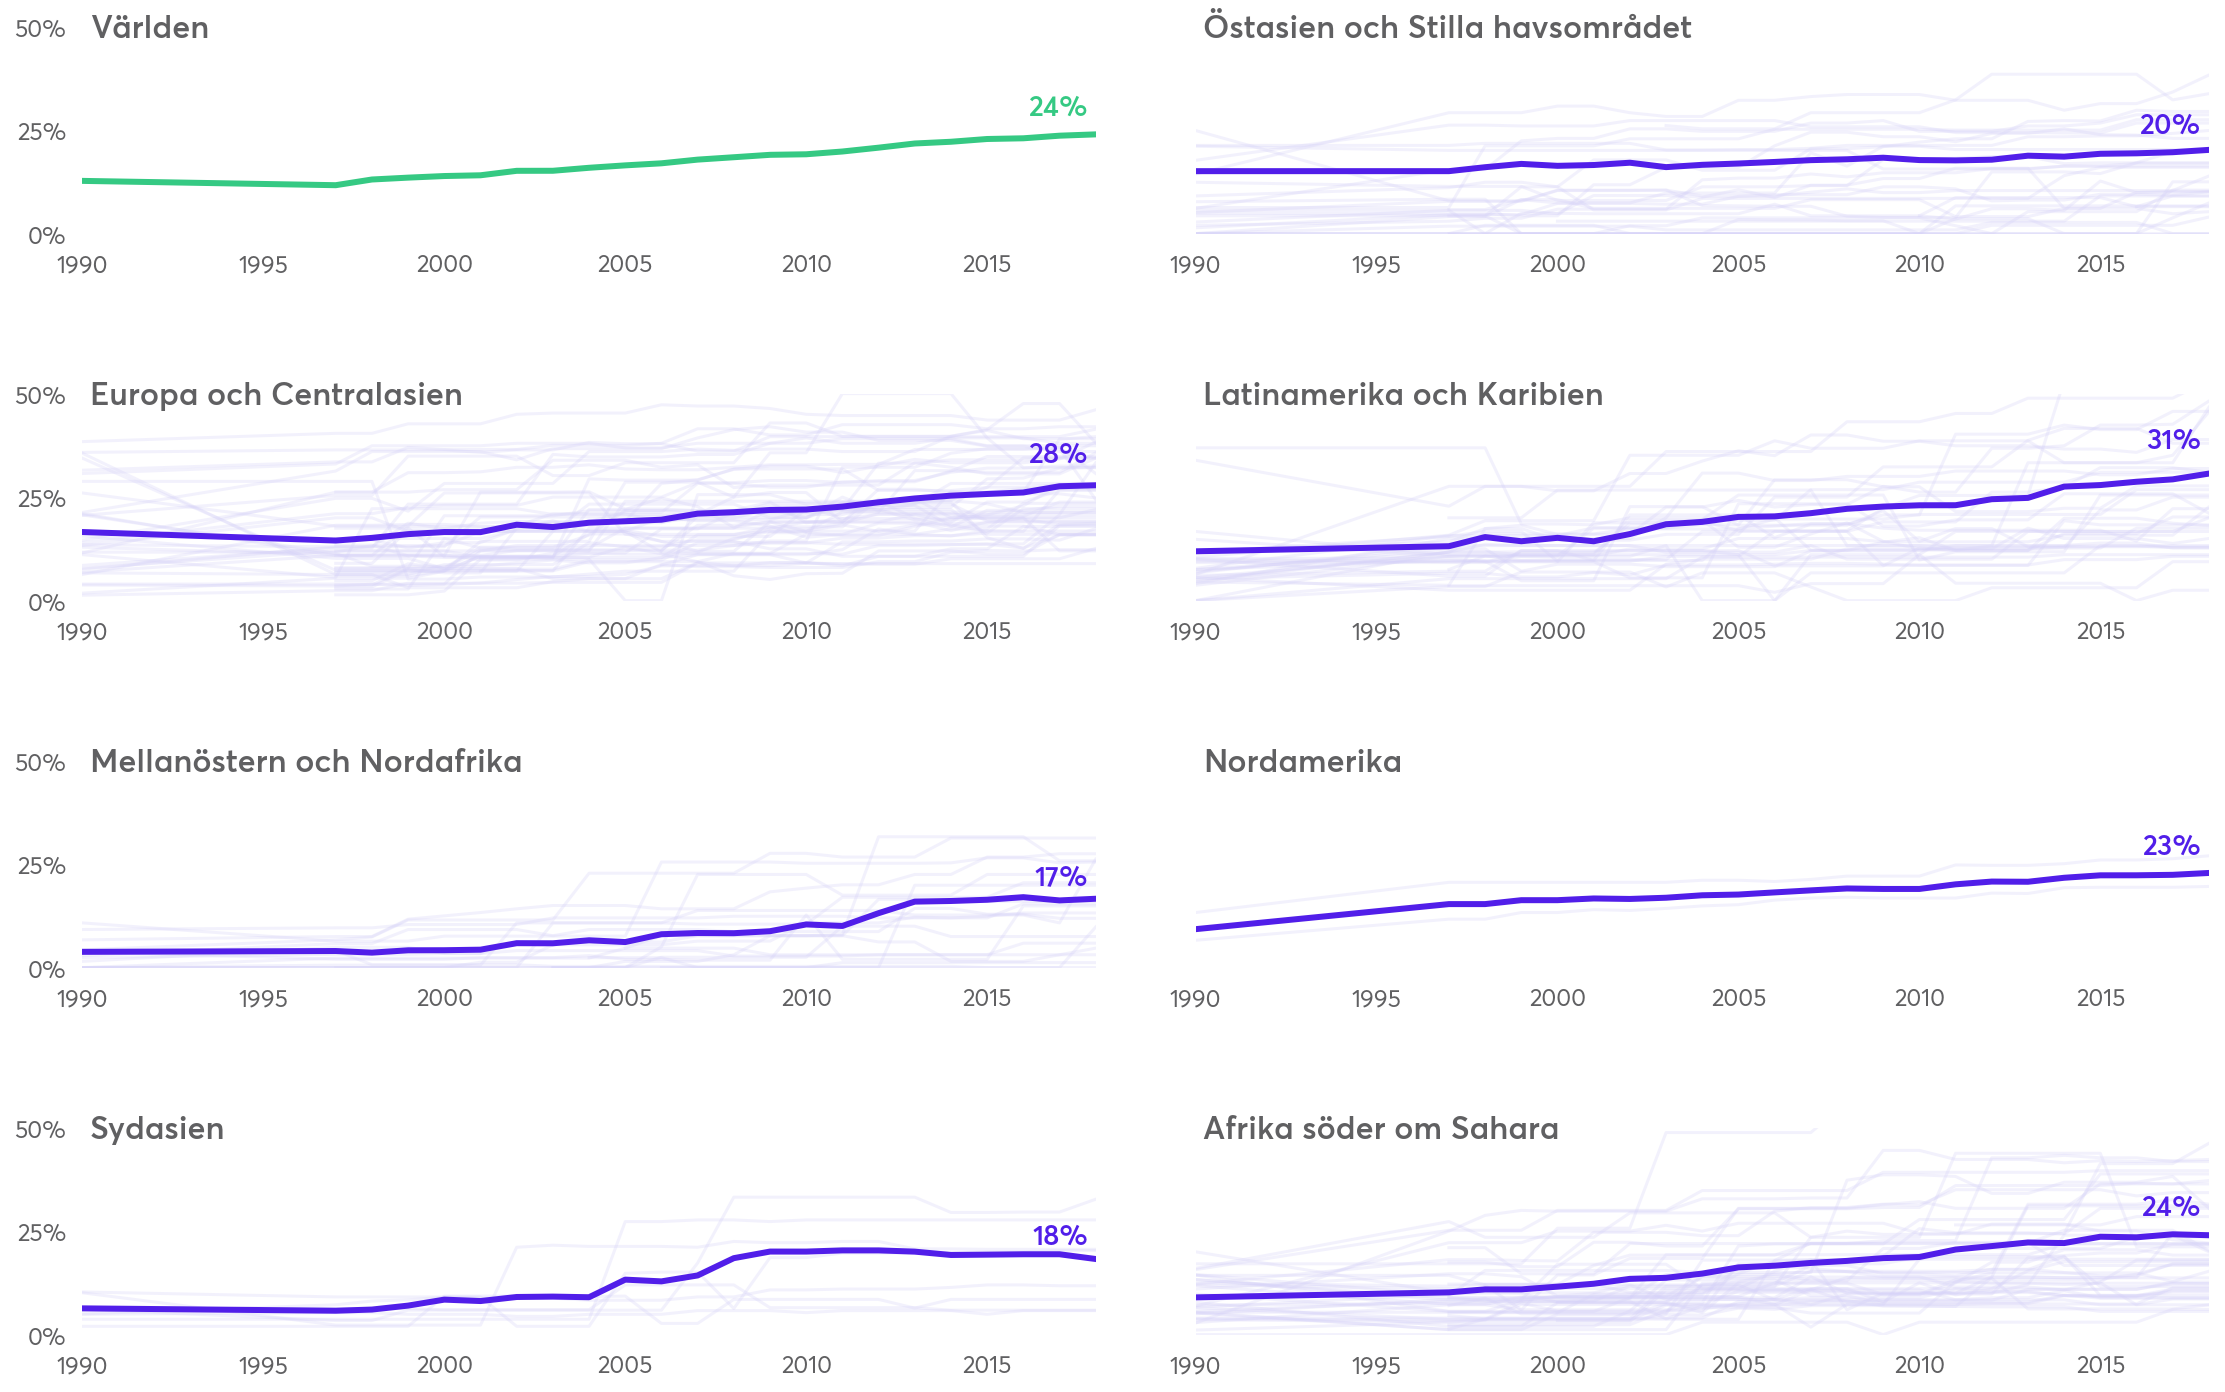

In [12]:
w = 12
h = w * 0.45
figsize = (w, h)

fig, axes = ds_plot(4, 2, figsize=(16, 10), sharex=False, sharey=True)
plt.tight_layout(h_pad=5, w_pad=3, rect=(0.01, 0.02, 1, 1))

y_vals = [0, 25, 50]

world = weighted_avgs.loc['World']
world.index = world.index.astype(int)

ax = axes.flat[0]
ax.grid(False)
ds_style(ax)

ax.set_yticks(y_vals)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in y_vals])

ax.plot(world, color='#35c983', alpha=1, lw=3)
ax.text(1990.2, 49.5, 'Världen', fontdict={'size': 16, 'weight': 500, 'color': '#606062'}, va='center')
ax.text(2017.8, world.loc[2018] * 1.2, str(int(round(world.loc[2018]))) + '%', ha='right',
        fontdict={'size': 14, 'color': '#35c983', 'weight': 500})

ax.set_xlim(1990, 2018)

for region, ax in zip(df.index.get_level_values(0).unique(), axes.flat[1:]):
    mean = weighted_avgs.loc[region].fillna(method='ffill').T
    mean.index = mean.index.astype(int)
    data = df.loc[region].T
    data = data.fillna(method='ffill')
    data.index = data.index.astype(int)
    
    ax.set_yticks(y_vals)
    ax.set_yticklabels([f'{x}%' for x in y_vals])
    
    mean = mean.fillna(data.T.mean())
    
    ax.plot(data, color='#d5d1f8', alpha=0.3)
    ax.plot(mean, color='#511ee9', alpha=1, lw=3)
    
    ax.text(1990.2, 49.5, region_map[region], fontdict={'size': 16, 'weight': 500, 'color': '#606062'}, va='center')
    ax.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
    ax.set_ylim(0, 50)
    ax.set_xlim(1990, 2018)
    ax.grid(False)
    
    ds_style(ax)
    
    ax.text(2017.8, mean.loc[2018] * 1.2, str(int(round(mean.loc[2018]))) + '%', ha='right',
            fontdict={'size': 14, 'color': '#511ee9', 'weight': 500})
    
fig.set_facecolor('#ffffff')
fig.savefig('../charts/female-mps.png')